In [1]:
"""!pip install featuretools==1.7.0
!pip install joblib==1.0.1
!pip install matplotlib==3.3.4
!pip install numpy==1.20.1
!pip install pandas==1.3.5
!pip install scikit_learn==0.24.1
!pip install scipy==1.6.2
!pip install seaborn==0.11.1
!pip install xgboost==1.5.1"""

'!pip install featuretools==1.7.0\n!pip install joblib==1.0.1\n!pip install matplotlib==3.3.4\n!pip install numpy==1.20.1\n!pip install pandas==1.3.5\n!pip install scikit_learn==0.24.1\n!pip install scipy==1.6.2\n!pip install seaborn==0.11.1\n!pip install xgboost==1.5.1'

In [2]:
#Importing Necessary Libraries
#Matplot and seaborn for making graphs
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
import featuretools as ft
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
 #Imorting the datasets
train =pd.read_csv("train_kOBLwZA.csv")
test=pd.read_csv("test_t02dQwI.csv")

print(train.shape,test.shape)

(8523, 12) (5681, 11)


In [4]:
def concat(X,Y):
    df= pd.concat([X,Y],ignore_index=True)
    return df

In [5]:
df=concat(train,test)
print(df.shape)

(14204, 12)


In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.isnull().sum()  
#Checks number of null values for all the variables
#Item_Weight has 2439 null values 
#Outlet Size has 4016 null values

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [8]:
df.apply(lambda x: len(x.unique()))
#Checks the number of unique entries correspnding to each variable

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [9]:
#defining a function:
#frequency of unique entries in each columns with their names

def frequency_each_item(X,Y):
    for i in Y:
        print("frequency of each category for",i)
        print(X[i].value_counts())

In [10]:
#frequency of unique entries in each columns with their names
category=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type']
frequency_each_item(df,category)

frequency of each category for Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
frequency of each category for Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
frequency of each category for Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
frequency of each category for Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
frequency of each category

In [11]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Sanity Check

### Fixing Inconsistencies in "Item_Fat_Content"

In [12]:
# Correcting the mis-written datas
df['Item_Fat_Content'].replace(to_replace =['low fat','reg','LF'], 
                 value =['Low Fat','Regular','Low Fat'],inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

### Handling Missing Value for "Outlet_Size"

In [13]:
mode_Outlet_Size= df.groupby(['Outlet_Type'])['Outlet_Size'].agg(pd.Series.mode)
print(mode_Outlet_Size)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object


In [14]:
## Explantory Code
# mode_Outlet_Size.loc['Grocery Store']

In [15]:
bool2=df['Outlet_Size'].isnull()
df['Outlet_Size'][bool2]=df['Outlet_Type'][bool2].apply(lambda x : mode_Outlet_Size.loc[x]).values
sum(df['Outlet_Size'].isnull())

0

### Handling Missing Value for "Item_Weight"

In [16]:
avg_item_weight=df.groupby('Item_Identifier')['Item_Weight'].agg(np.mean)
print(avg_item_weight)
bool_value=df['Item_Weight'].isnull()
df['Item_Weight'][bool_value]=df['Item_Identifier'][bool_value].apply(lambda x :avg_item_weight.loc[x]).values
sum(df['Item_Weight'].isnull())

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64


0

In [17]:
## Explanation code--
# avg_item_weight[avg_item_weight.index=='DRI11']
# df['Item_Weight'][bool_value],df['Item_Identifier'][bool_value]
# df['Item_Weight'][7],df['Item_Weight'][18]
# df['Item_Weight'][7],df['Item_Weight'][18]

In [18]:
#Reducing food category to only 3 types with the help of the first 2 alphabets of the Item_Identifier column

df['Item_Type_combined']=df['Item_Identifier'].apply(lambda x : x[0:2])
df['Item_Type_combined'].replace(to_replace =['FD','DR','NC'], 
                 value =['Food','Drinks','Non_consumable'],inplace=True)
 #dropping the redundant column
df=df.drop(columns=['Item_Type'])     
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_consumable


In [19]:
#Calculating number of Item_fat_contents that are also non_consumable

bool3=df['Item_Type_combined']=='Non_consumable'
df['Item_Fat_Content'][bool3]='Non_edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non_edible    2686
Name: Item_Fat_Content, dtype: int64

In [20]:
#Using feature Engineering and adding new column
df['years_old']=2022-df['Outlet_Establishment_Year']
df=df.drop(columns=['Outlet_Establishment_Year'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,years_old
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,23
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,13
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,23
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,Food,24
4,NCD19,8.93,Non_edible,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non_consumable,35


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       14204 non-null  object 
 1   Item_Weight           14204 non-null  float64
 2   Item_Fat_Content      14204 non-null  object 
 3   Item_Visibility       14204 non-null  float64
 4   Item_MRP              14204 non-null  float64
 5   Outlet_Identifier     14204 non-null  object 
 6   Outlet_Size           14204 non-null  object 
 7   Outlet_Location_Type  14204 non-null  object 
 8   Outlet_Type           14204 non-null  object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  Item_Type_combined    14204 non-null  object 
 11  years_old             14204 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [22]:
# Converting all the zero values to mean in the visibility column
Item_Visibility_mean=df.groupby('Item_Identifier' )['Item_Visibility'].mean()
Item_Visibility_mean
bool4=df['Item_Visibility']==0
df['Item_Visibility'][bool4]=df['Item_Identifier'][bool4].apply(lambda x:Item_Visibility_mean.loc[x]).values
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,years_old
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,23
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,13
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,23
3,FDX07,19.20,Regular,0.017834,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,Food,24
4,NCD19,8.93,Non_edible,0.009780,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non_consumable,35


In [23]:
#Checks for correation between different numerical columns
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,years_old
Item_Weight,1.000000,-0.022028,0.035751,0.013261,-0.000247
Item_Visibility,-0.022028,1.000000,-0.007550,-0.128453,0.084481
Item_MRP,0.035751,-0.007550,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.013261,-0.128453,0.567574,1.000000,0.049135
years_old,-0.000247,0.084481,-0.000141,0.049135,1.000000


# Identifying outliers and fixing them

In [24]:
df.describe()            

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,years_old
count,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.793380,0.069710,141.004977,2181.288914,24.169319
std,4.651716,0.049728,62.086938,1706.499616,8.371664
min,4.555000,0.003575,31.290000,33.290000,13.000000
25%,8.710000,0.031145,94.012000,834.247400,18.000000
50%,12.600000,0.057194,142.247000,1794.331000,23.000000
75%,16.750000,0.096930,185.855600,3101.296400,35.000000
max,21.350000,0.328391,266.888400,13086.964800,37.000000


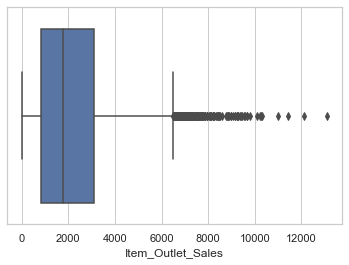

In [25]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Item_Outlet_Sales"])

In [26]:
#As we know only Item_Outlet_Sales have outliers we can fix them but fixing them will increase our RMSE score 
#to a large extent

# Plotting Graphs for more Analysis

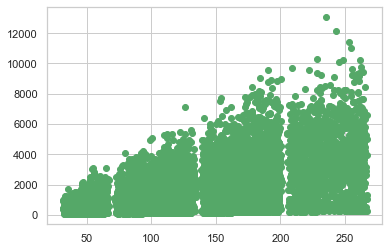

In [27]:
#value of sales increases for the increase in MRP of the item
plt.scatter(df.Item_MRP,df.Item_Outlet_Sales,c='g')
plt.show()

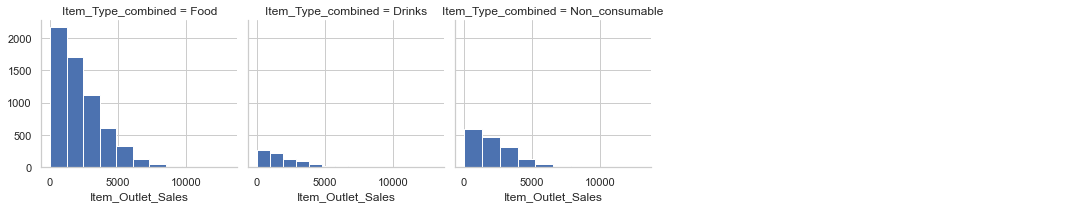

In [28]:
sns.FacetGrid(df, col='Item_Type_combined', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
# Maximum contribution to outlet sales is from Items that are food type and least is from drinks

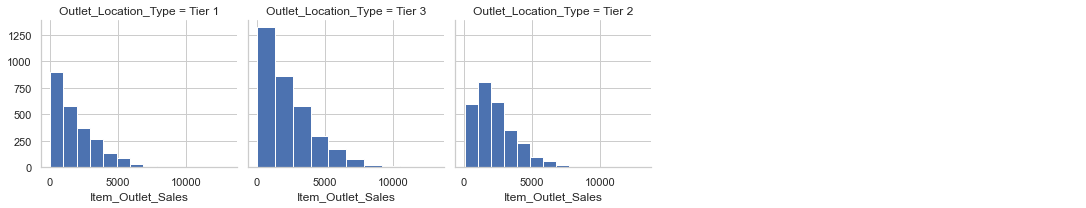

In [29]:
sns.FacetGrid(df, col='Outlet_Location_Type', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
#Tier3 type of outlet location provides for the maximum sales and other two provides the least sales

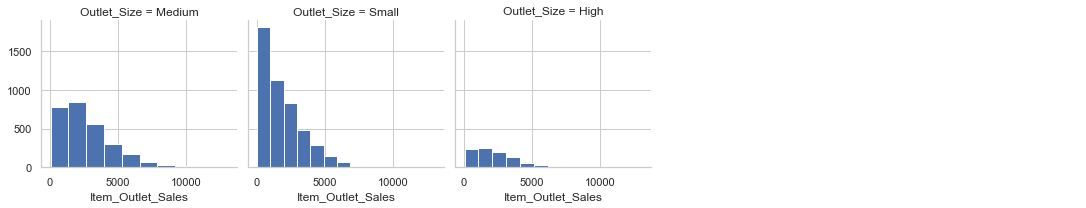

In [30]:
sns.FacetGrid(df, col='Outlet_Size', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
#Small sized Outlets are providing the maximum sales whereas large sized outlets 
# are contributing the least

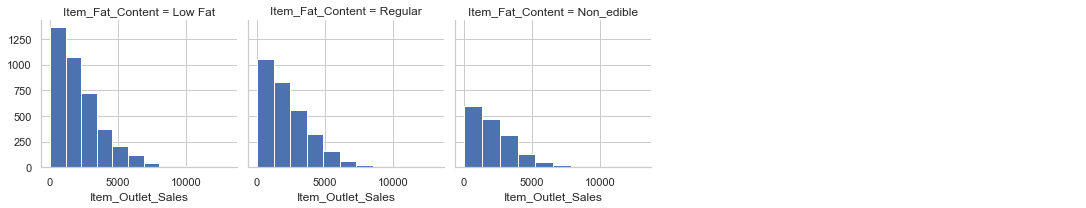

In [31]:
sns.FacetGrid(df, col='Item_Fat_Content', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
# people are prefering items with lowest fat content the most 

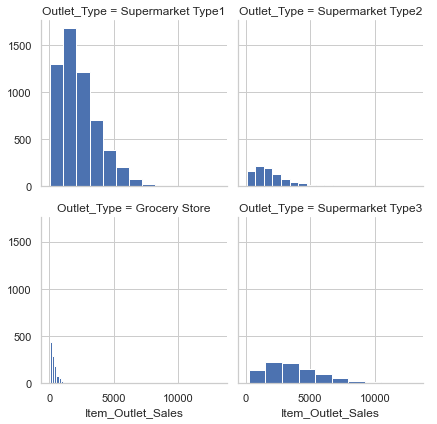

In [32]:
sns.FacetGrid(df, col='Outlet_Type', size=3, col_wrap=2) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
#Maximum of the high sales margin is from Supermarket Type1
#Grocery store has the least sales

In [33]:
#Label Encoding all the columns with text entries and dropping Item_identifier  
le=LabelEncoder()
list=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_combined',
      'Outlet_Size']
for i in list:
    le.fit(df[i])
    df[i]=le.transform(df[i])
df_new=df.drop(columns='Item_Identifier')
df_new= pd.get_dummies(df_new,columns=['Outlet_Identifier'])
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,years_old,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,1,23,0,0,0,0,0,0,0,0,0,1
1,5.92,2,0.019278,48.2692,1,2,2,443.4228,0,13,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,1,23,0,0,0,0,0,0,0,0,0,1
3,19.20,2,0.017834,182.0950,2,2,0,732.3800,1,24,1,0,0,0,0,0,0,0,0,0
4,8.93,1,0.009780,53.8614,0,2,1,994.7052,2,35,0,1,0,0,0,0,0,0,0,0


In [34]:
#Separating test and train set
df_new_train=df_new.iloc[:8523,:]
df_new_test=df_new.iloc[8523:,:]
df_new_test=df_new_test.drop(columns=['Item_Outlet_Sales'])

In [35]:
Y_train=df_new_train['Item_Outlet_Sales']
df_train_test=df_new_train.drop(columns=['Item_Outlet_Sales'])

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import QuantileRegressor
#### To Be applied after we cover these Algorithms.

# from sklearn.ensemble import RandomForestRegressor 
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.ensemble import BaggingRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.neural_network import MLPRegressor
# from xgboost import XGBRegressor
# import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score



In [37]:
models = [('lr',LinearRegression()),
#           ('sgd',SGDRegressor()),
          ('lasso',Lasso()),
          ('ridge',Ridge()),
          ('en',ElasticNet()),
#           ('huber',HuberRegressor()),
          ('ransac',RANSACRegressor()),
#           ('theilSen',TheilSenRegressor()),
#           ('quant reg',QuantileRegressor())
         ]

In [38]:
#Making function for making best 2 models for further hyperparameter tuning
def basic_model_selection(x,y,cross_folds,model):
    scores=[]
    names = []
    for i , j in model:
        cv_scores = cross_val_score(j, x, y, cv=cross_folds,n_jobs=5)
        scores.append(cv_scores)
        names.append(i)
    for k in range(len(scores)):
        print(names[k],scores[k].mean())

In [39]:
basic_model_selection(df_train_test,Y_train,4,models)

lr 0.5600167514366816
lasso 0.5600380234974154
ridge 0.5600211200777784
en 0.4778293365405345
ransac 0.40058321118806794


# Standardization of the model before training

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized=scaler.fit_transform(df_train_test)
column_names = df_train_test.columns
df_standardized = pd.DataFrame(data=standardized,columns=column_names)
df_standardized.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_combined,years_old,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,-0.769246,-0.997813,-1.081039,1.747454,-0.664080,-1.369334,-0.252658,-0.179795,-0.139541,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362
1,-1.496813,1.236942,-1.016230,-1.489023,-0.664080,1.091569,1.002972,-2.095286,-1.334103,-0.263920,-0.350395,-0.349128,2.860816,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973
2,0.995858,-0.997813,-1.066741,0.010040,-0.664080,-1.369334,-0.252658,-0.179795,-0.139541,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362
3,1.361794,1.236942,-1.045193,0.660050,0.799954,1.091569,-1.508289,-0.179795,-0.020085,3.789031,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973
4,-0.848890,0.119565,-1.206757,-1.399220,-2.128115,1.091569,-0.252658,1.735696,1.293934,-0.263920,2.853918,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973


In [43]:
basic_model_selection(df_standardized,Y_train,4,models)

lr 0.5596423399412482
lasso 0.5600954106586716
ridge 0.5600174793091026
en 0.5116678074172953
ransac 0.41201789283280615


# Using Robust Scaler

#### My dataset having outliers make it more prone to mistakes
* Robust Scaler handles the outliers as well
* It scales according to the quartile range

In [44]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
robust = RobustScaler(quantile_range = (0.1,0.8)) #range of inerquartile is one of the parameters
robust_stan = robust.fit_transform(df_train_test)
robust_stan_normalize = normalize.fit_transform(robust_stan)
# also normalized the dataset using MinMaxScaler i.e has bought the data set between (0,1)
df_robust_normalize = pd.DataFrame(robust_stan_normalize,columns=column_names)
df_robust_normalize.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_combined,years_old,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0.282525,0.0,0.038399,0.927507,0.5,0.0,0.333333,0.5,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.081274,1.0,0.048346,0.072068,0.5,1.0,0.666667,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.770765,0.0,0.040593,0.468288,0.5,0.0,0.333333,0.5,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.871986,1.0,0.043901,0.640093,1.0,1.0,0.000000,0.5,0.458333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.5,0.019104,0.095805,0.0,1.0,0.333333,1.0,0.916667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
basic_model_selection(df_robust_normalize,Y_train,4,models)

lr 0.5600807120780363
lasso 0.5602359565219659
ridge 0.560024447390153
en 0.16451783452458144
ransac 0.4239421595512125


# Best Model 
#### Comparing all models using RMSE score 

In [46]:
robust_test = robust.fit_transform(df_new_test)
robust_normalize_test = normalize.fit_transform(robust_test)
df_test_robust_normalize = pd.DataFrame(robust_normalize_test,columns=column_names)

In [47]:
model = LinearRegression()
# Defining my final model that I will use for prediction

In [48]:
model.fit(df_robust_normalize,Y_train)

LinearRegression()

In [49]:
final_prediction=model.predict(df_test_robust_normalize) #Predicting the outlet sales

In [50]:
#the prediction is in the form of numpy array 
# Converting into Dataframe 
df_final_prediction = pd.DataFrame(final_prediction,columns=['Item_Outlet_Sales'])

In [51]:
df_final_prediction.head()

,Item_Outlet_Sales
0,1831.0
1,1549.0
2,1892.0
3,2565.0
4,5189.0


# Saving the final model using Joblib

In [53]:
import joblib
filename = 'final_model.sav' # Name of the model 
joblib.dump(model, filename) # it is saved in your current working directory

['final_model.sav']

In [54]:
# This command loads the model once again
load_model = joblib.load(filename)

In [64]:
float_formatter = "{:.2f}".format

In [69]:
load_model.predict(np.array(df_robust_normalize.iloc[0,:]).reshape(1, -1))

array([4042.])

In [70]:
load_model.predict(np.array(df_robust_normalize.iloc[0:5,:]))

array([4042.,  604., 2360., 1023.,  928.])

In [71]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,years_old
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1,0,1,3735.1380,1,23
1,DRC01,5.92,2,0.019278,48.2692,OUT018,1,2,2,443.4228,0,13
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1,0,1,2097.2700,1,23
3,FDX07,19.20,2,0.017834,182.0950,OUT010,2,2,0,732.3800,1,24
4,NCD19,8.93,1,0.009780,53.8614,OUT013,0,2,1,994.7052,2,35


# The Models for hyperparameter tuning are same Regression Models 

In [ ]:
def model_parameter_tuning(x,y,model,parameters,cross_folds):
    model_grid = GridSearchCV(model,
                        parameters,
                        cv = cross_folds,
                        n_jobs = 5,
                        verbose=True)
    model_grid.fit(x,y)
    y_predicted = model_grid.predict(x)
    print(model_grid.score)
    print(model_grid.best_params_)
    print("The RMSE score is",np.sqrt(np.mean((y-y_predicted)**2)))

#defining function for hyper parameter tuning and using RMSE as my metric

# model_parameter_tuning(df_standardized,Y_train,model,model_parameters,4)

# Building ML Pipeline for these Regression Models

# Building API for these Regression Models